In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("Credit Card Customer Data.csv")
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [7]:
df=df.drop(['Sl_No', 'Customer Key'],axis=1)
df

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3
...,...,...,...,...,...
655,99000,10,1,10,0
656,84000,10,1,13,2
657,145000,8,1,9,1
658,172000,10,1,15,0


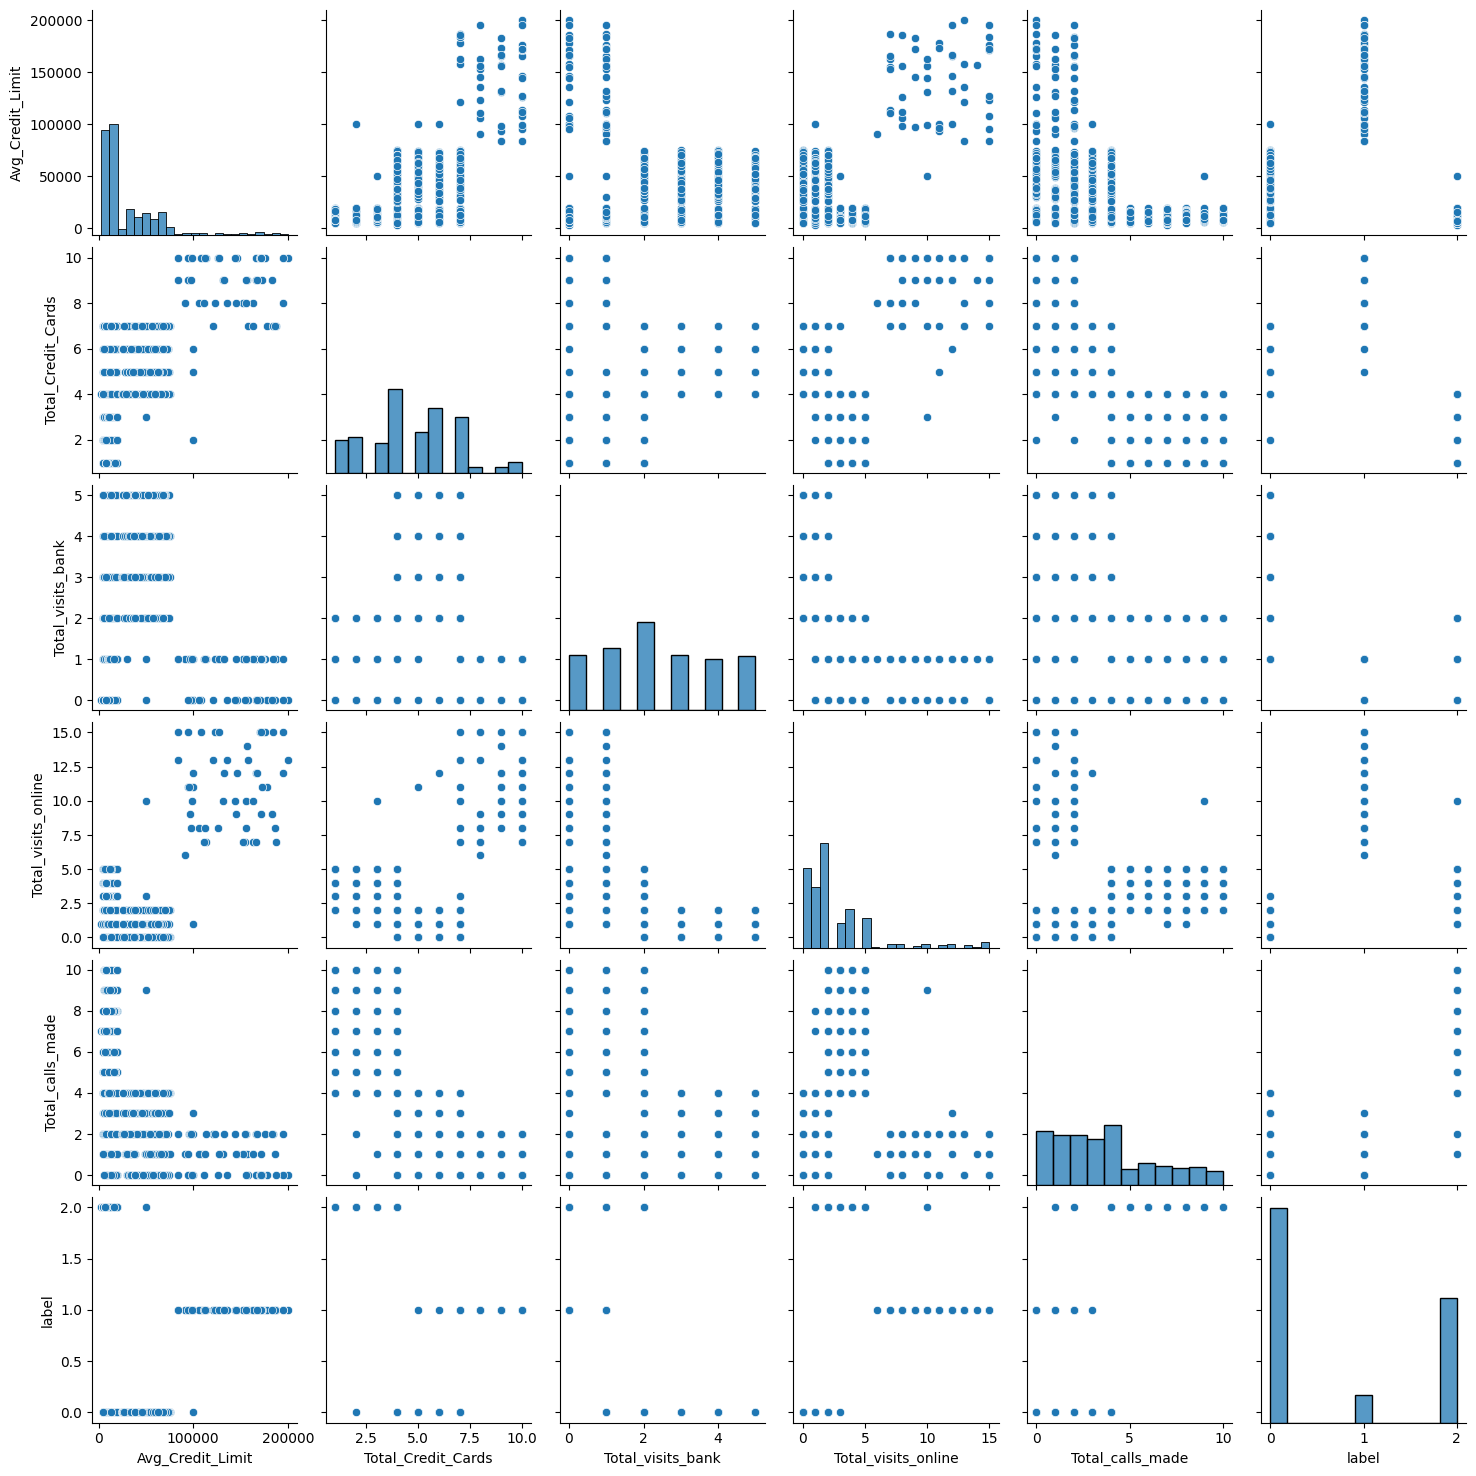

In [57]:
sns.pairplot(df)

In [38]:
df.shape

(660, 6)

In [39]:
df.shape[0]

660

In [40]:
df.shape[1]

6

In [34]:
df.isnull().sum()

Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
label                  0
dtype: int64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Avg_Credit_Limit     660 non-null    int64
 1   Total_Credit_Cards   660 non-null    int64
 2   Total_visits_bank    660 non-null    int64
 3   Total_visits_online  660 non-null    int64
 4   Total_calls_made     660 non-null    int64
 5   label                660 non-null    int32
dtypes: int32(1), int64(5)
memory usage: 28.5 KB


In [36]:
df.describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,label
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,34574.242424,4.706061,2.403030,2.606061,3.583333,1.263636
std,37625.487804,2.167835,1.631813,2.935724,2.865317,0.588364
min,3000.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,10000.000000,3.000000,1.000000,1.000000,1.000000,1.000000
50%,18000.000000,5.000000,2.000000,2.000000,3.000000,1.000000
75%,48000.000000,6.000000,4.000000,4.000000,5.000000,2.000000
max,200000.000000,10.000000,5.000000,15.000000,10.000000,2.000000


In [8]:
col=df.columns
col

Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made'],
      dtype='object')

Total_calls_made


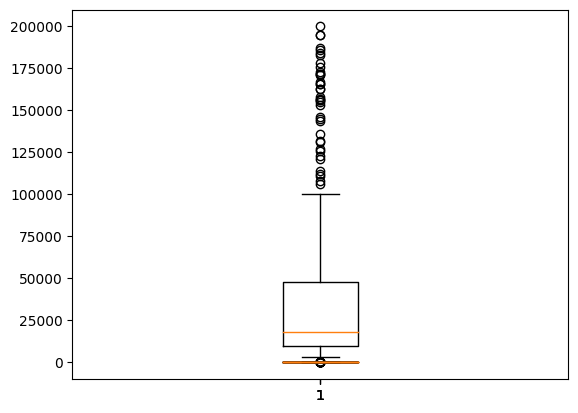

In [9]:
for i in col:
    plt.boxplot(i,data=df)
print(i)

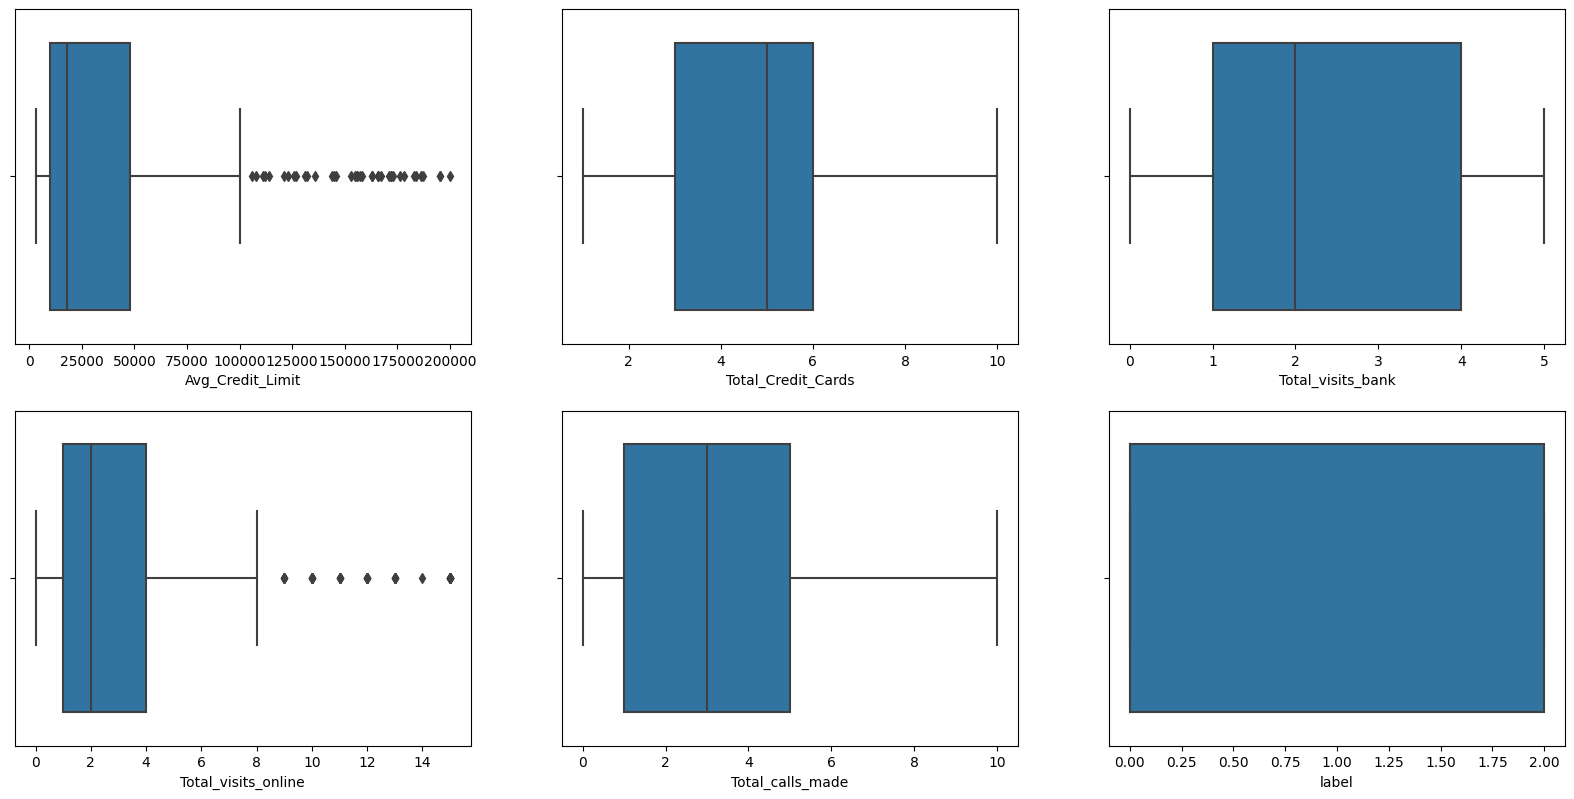

In [58]:
i=1
plt.figure(figsize=(20,20))
for j in df.columns:
    plt.subplot(4,3,i)
    sns.boxplot(data=df,x=j)
    i+=1

Total_calls_made


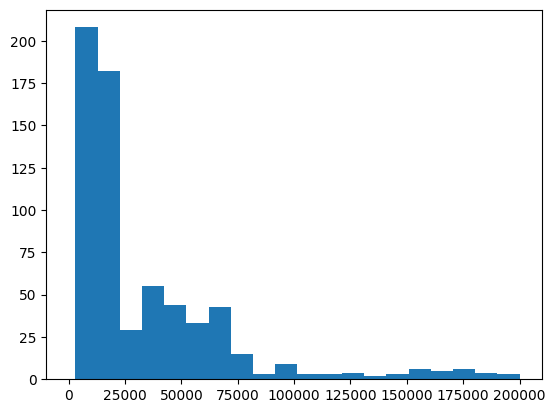

In [13]:
for i in col:
    plt.hist(i,data=df,bins=20)
print(i)

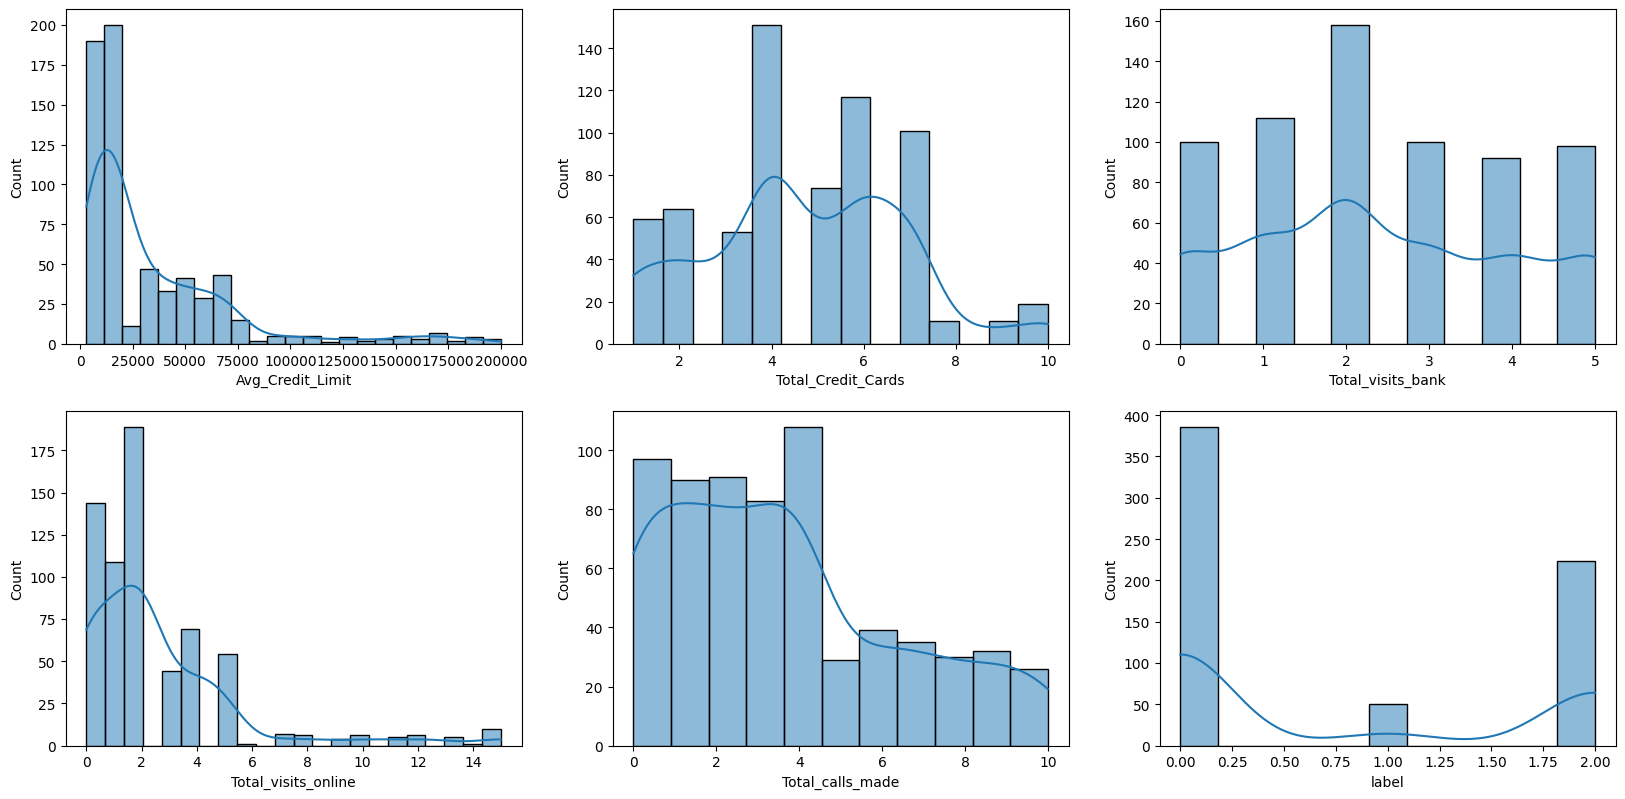

In [59]:
i=1
plt.figure(figsize=(20,20))
for j in df.columns:
    plt.subplot(4,3,i)
    sns.histplot(data=df,x=df[j],kde=True)
    i+=1

In [16]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled=sc.fit_transform(df)
scaled_d=pd.DataFrame(scaled,columns=col)
scaled_d

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739
...,...,...,...,...,...
655,1.713589,2.443892,-0.860451,2.520519,-1.251537
656,1.314621,2.443892,-0.860451,3.543188,-0.553005
657,2.937092,1.520613,-0.860451,2.179629,-0.902271
658,3.655235,2.443892,-0.860451,4.224968,-1.251537


In [18]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,13):
    km=KMeans(n_clusters=i)
    km.fit(scaled_d)
    wcss.append(km.inertia_)

In [21]:
from sklearn.metrics import silhouette_score
slh_score=[]
for i in range(2,13):
    km=KMeans(n_clusters=i)
    km.fit(df)
    slh_score.append(silhouette_score(scaled_d,km.labels_))

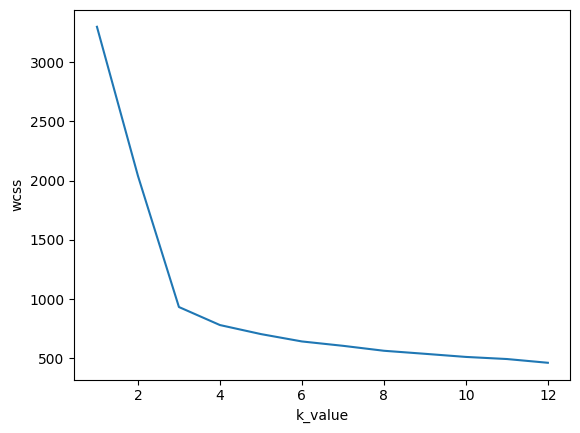

In [22]:
plt.plot(range(1,13),wcss)
plt.ylabel("wcss")
plt.xlabel("k_value")
plt.show()

Text(0, 0.5, 'silhouette soeeficient')

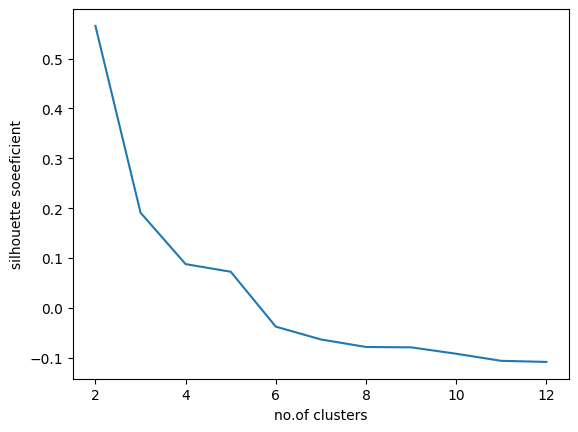

In [25]:
plt.plot(range(2,13),slh_score)
plt.xlabel("no.of clusters")
plt.ylabel("silhouette soeeficient")


In [53]:
# final model
km1=KMeans(n_clusters=3)
km1.fit(scaled_d)
y=km1.predict(scaled_d)
df["label"]=y

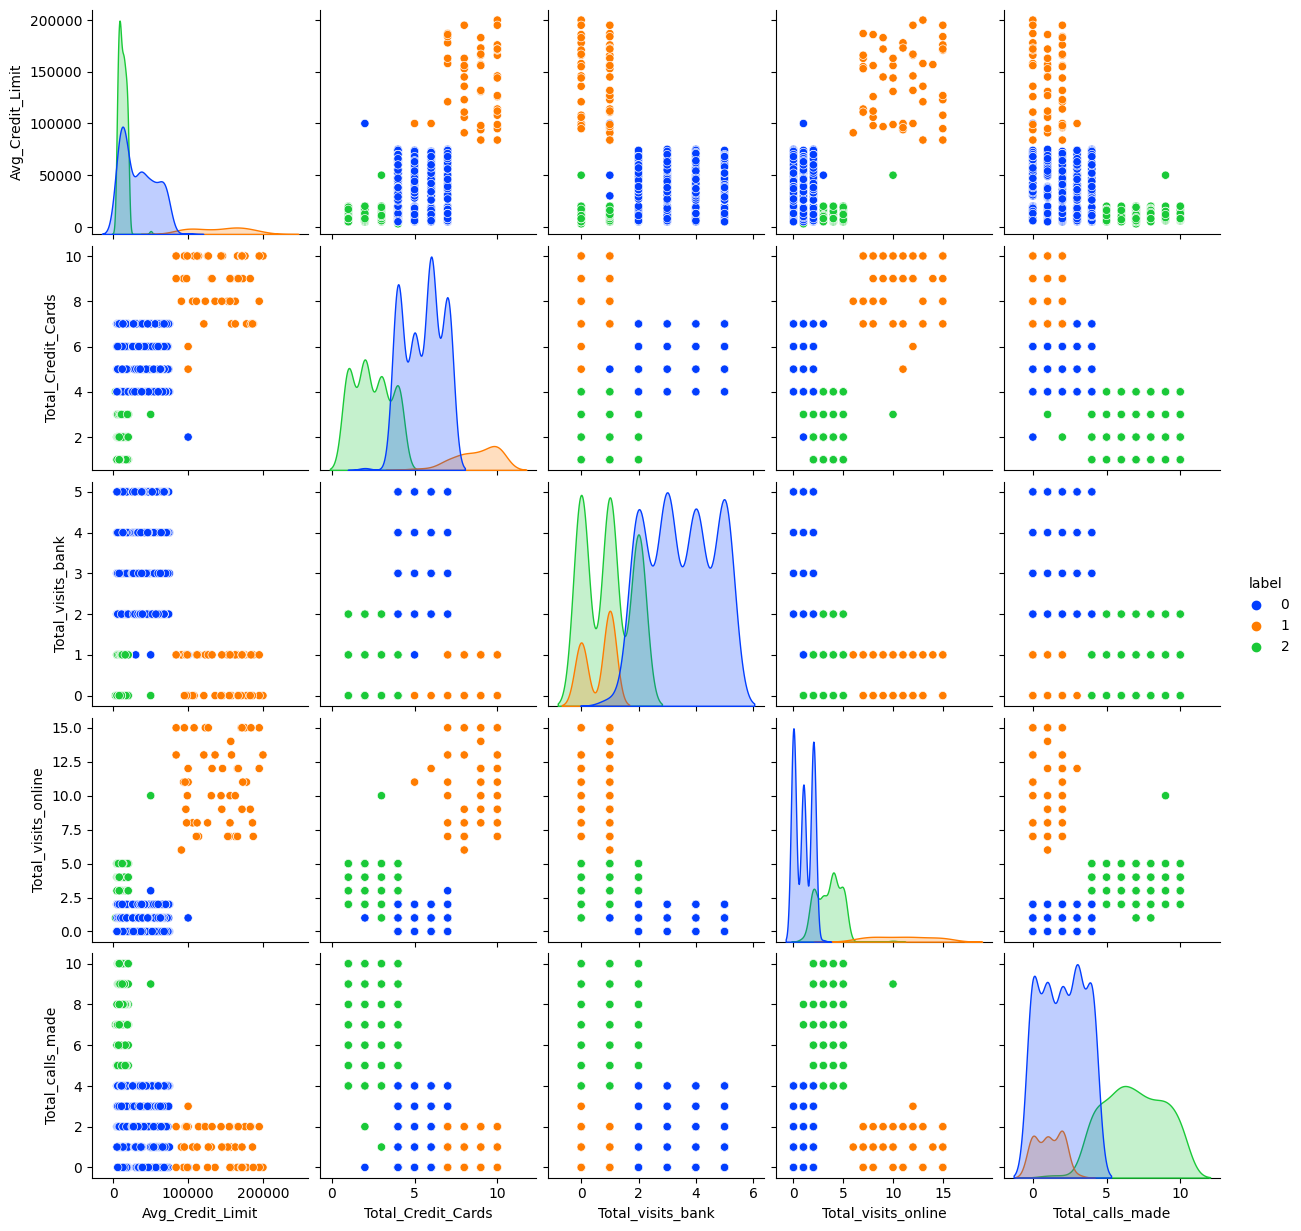

In [54]:
sns.pairplot(df,hue="label",palette="bright")

In [55]:
center=km1.cluster_centers_
center

array([[-0.02106178,  0.37368962,  0.6663945 , -0.55367163, -0.55300488],
       [ 2.83176409,  1.86222621, -1.10576269,  2.82731942, -0.87432983],
       [-0.59579625, -1.05962278, -0.9015185 ,  0.32299678,  1.14810882]])

In [56]:
kmean_silhouette=silhouette_score(scaled_d,km1.labels_)
kmean_silhouette

0.5157182558881063